In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [3]:
#Basic configurations for improving visualization of graphs

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
df = pd.read_csv(r'C:\Users\vedas\Downloads\archive (3)\INvideos.csv')

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


In [8]:
df["description"] = df["description"].fillna(value="")

In [9]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

trending_date
2018   0.76
2017   0.24
Name: proportion, dtype: float64

In [10]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


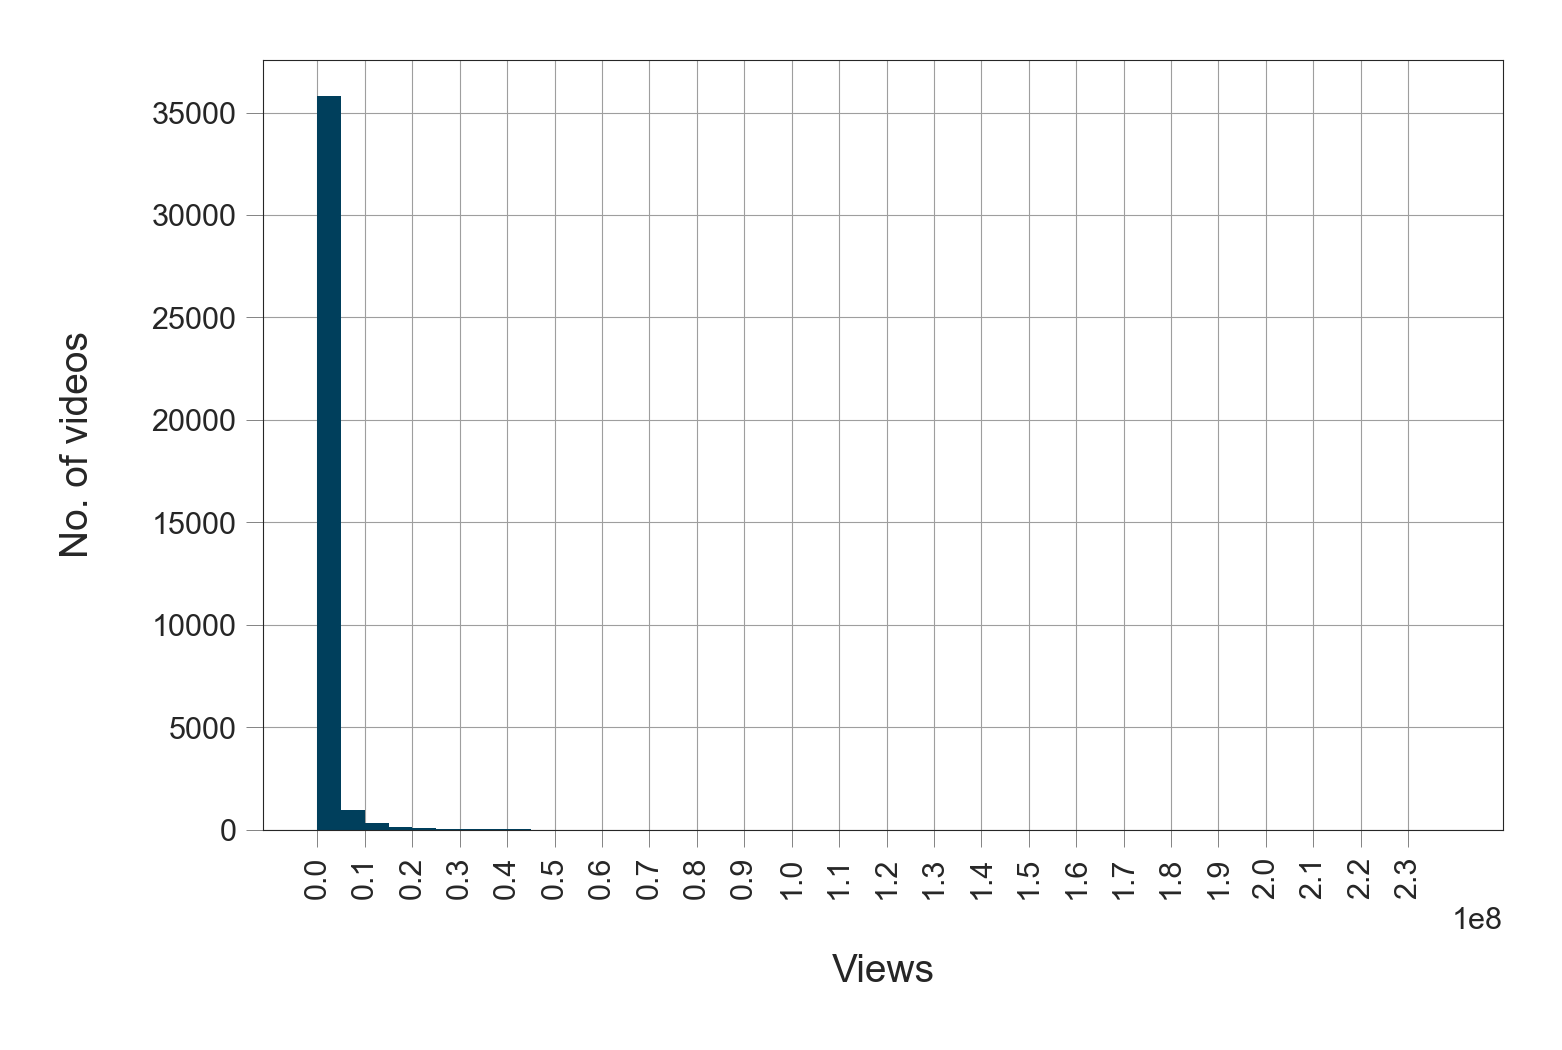

In [11]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

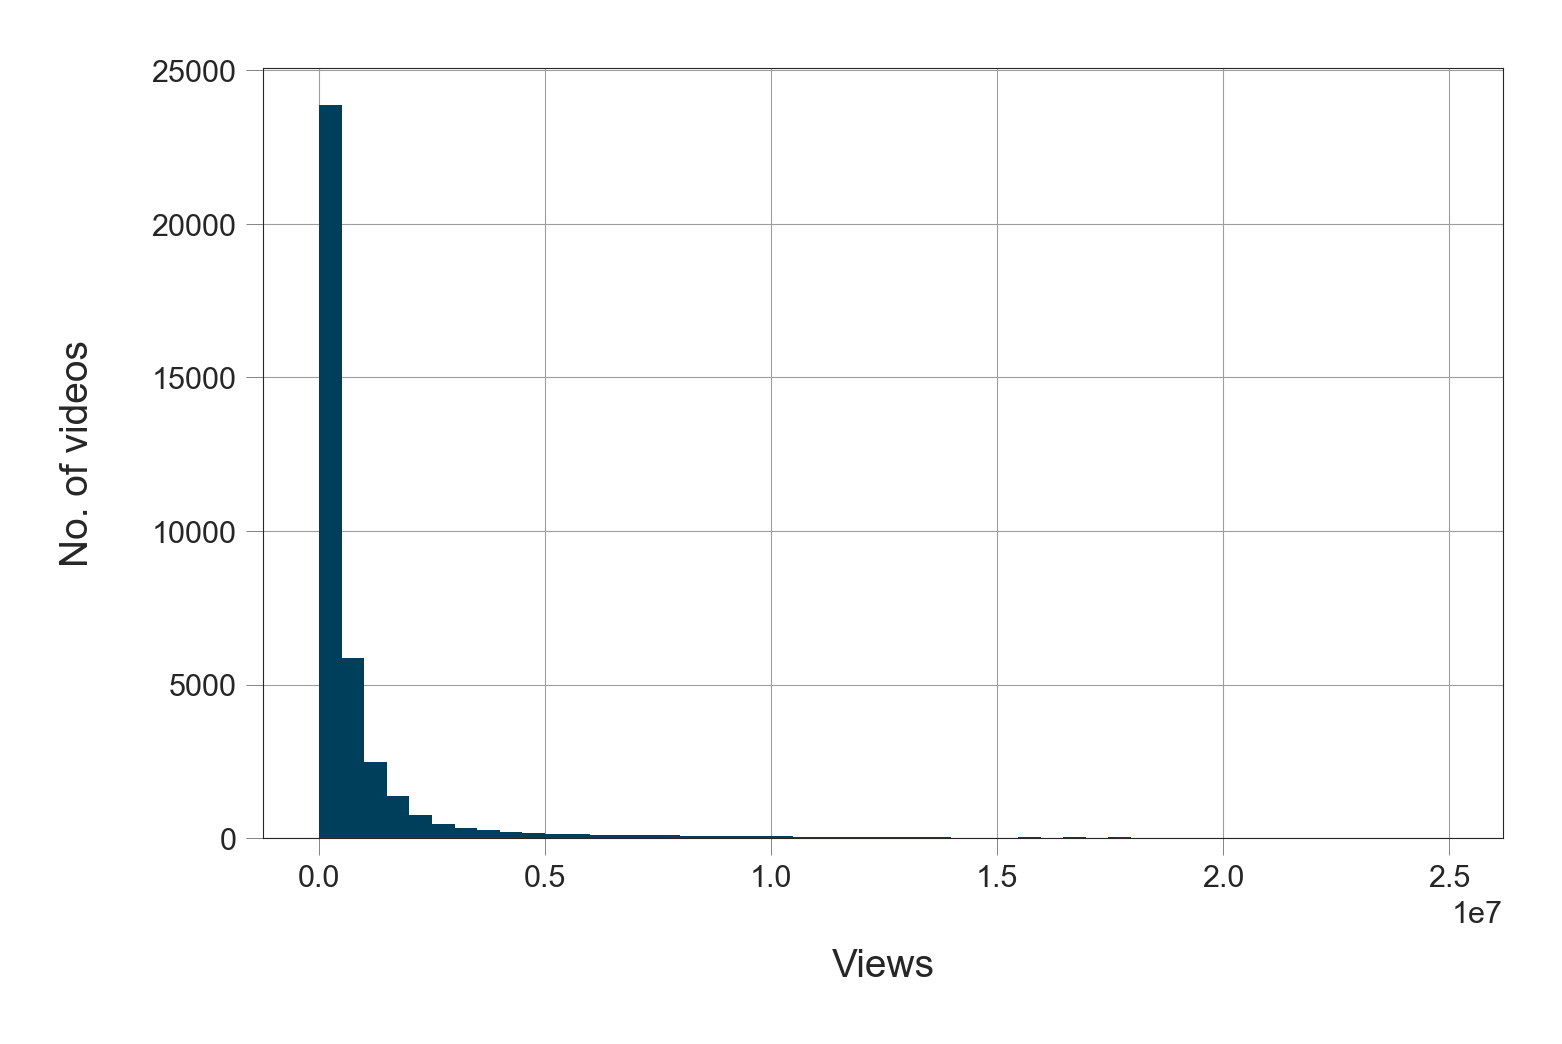

In [12]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [13]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

79.56735917755408

In [14]:
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100

86.19083315485115

In [15]:
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

95.82887127864639

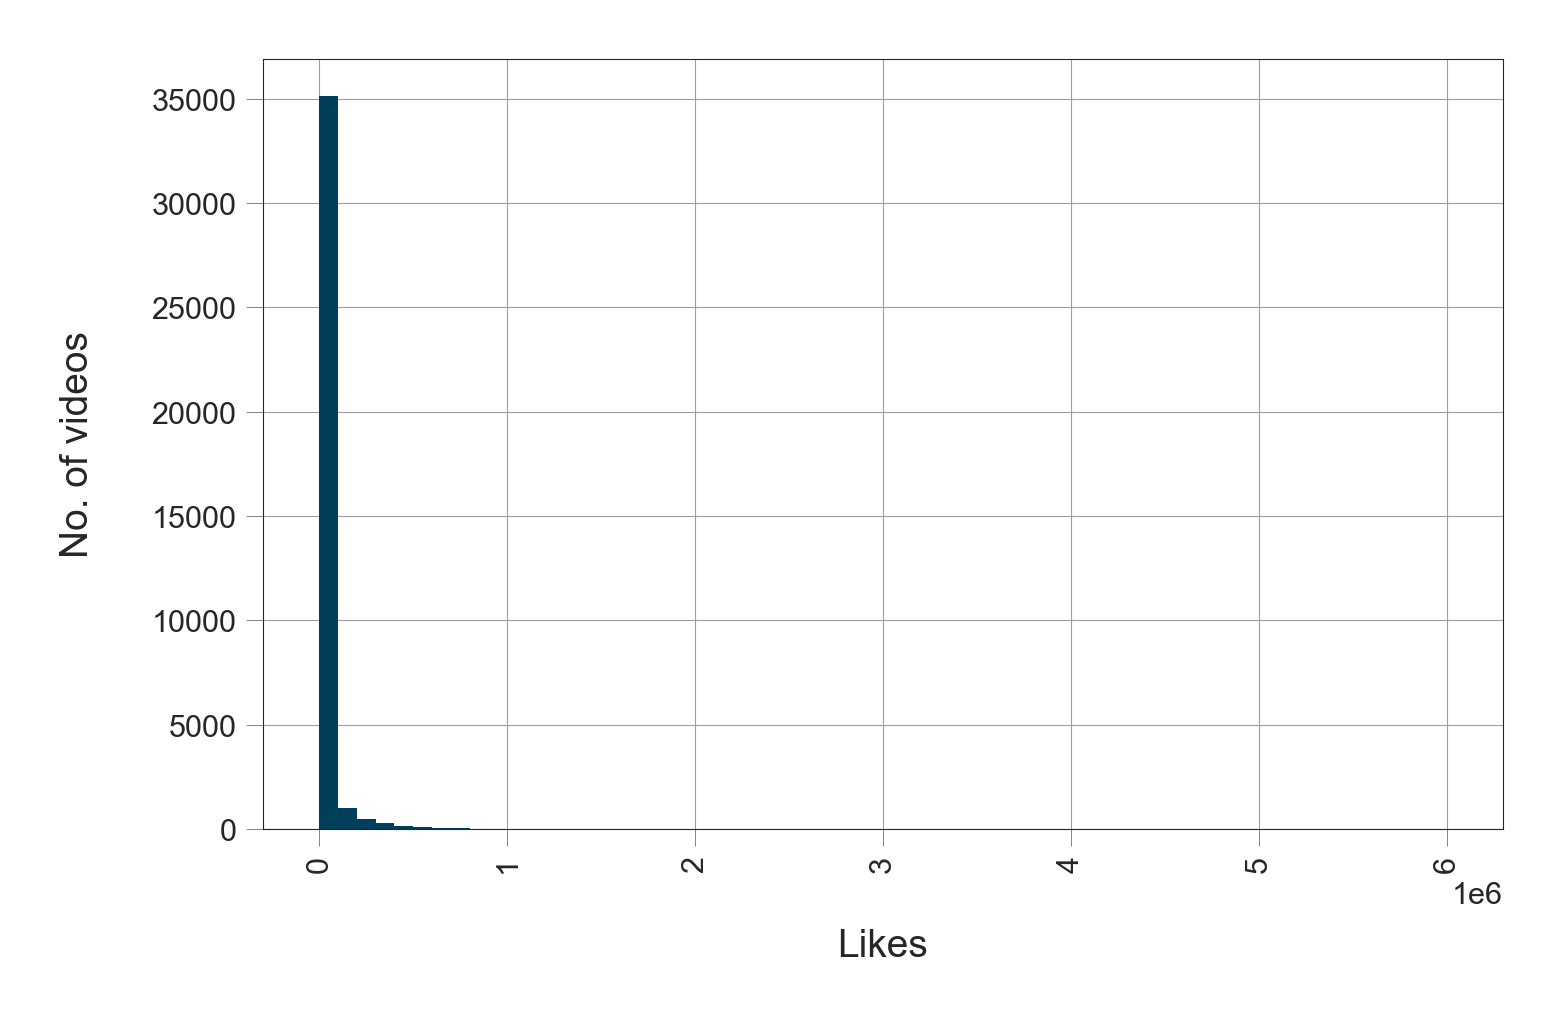

In [16]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

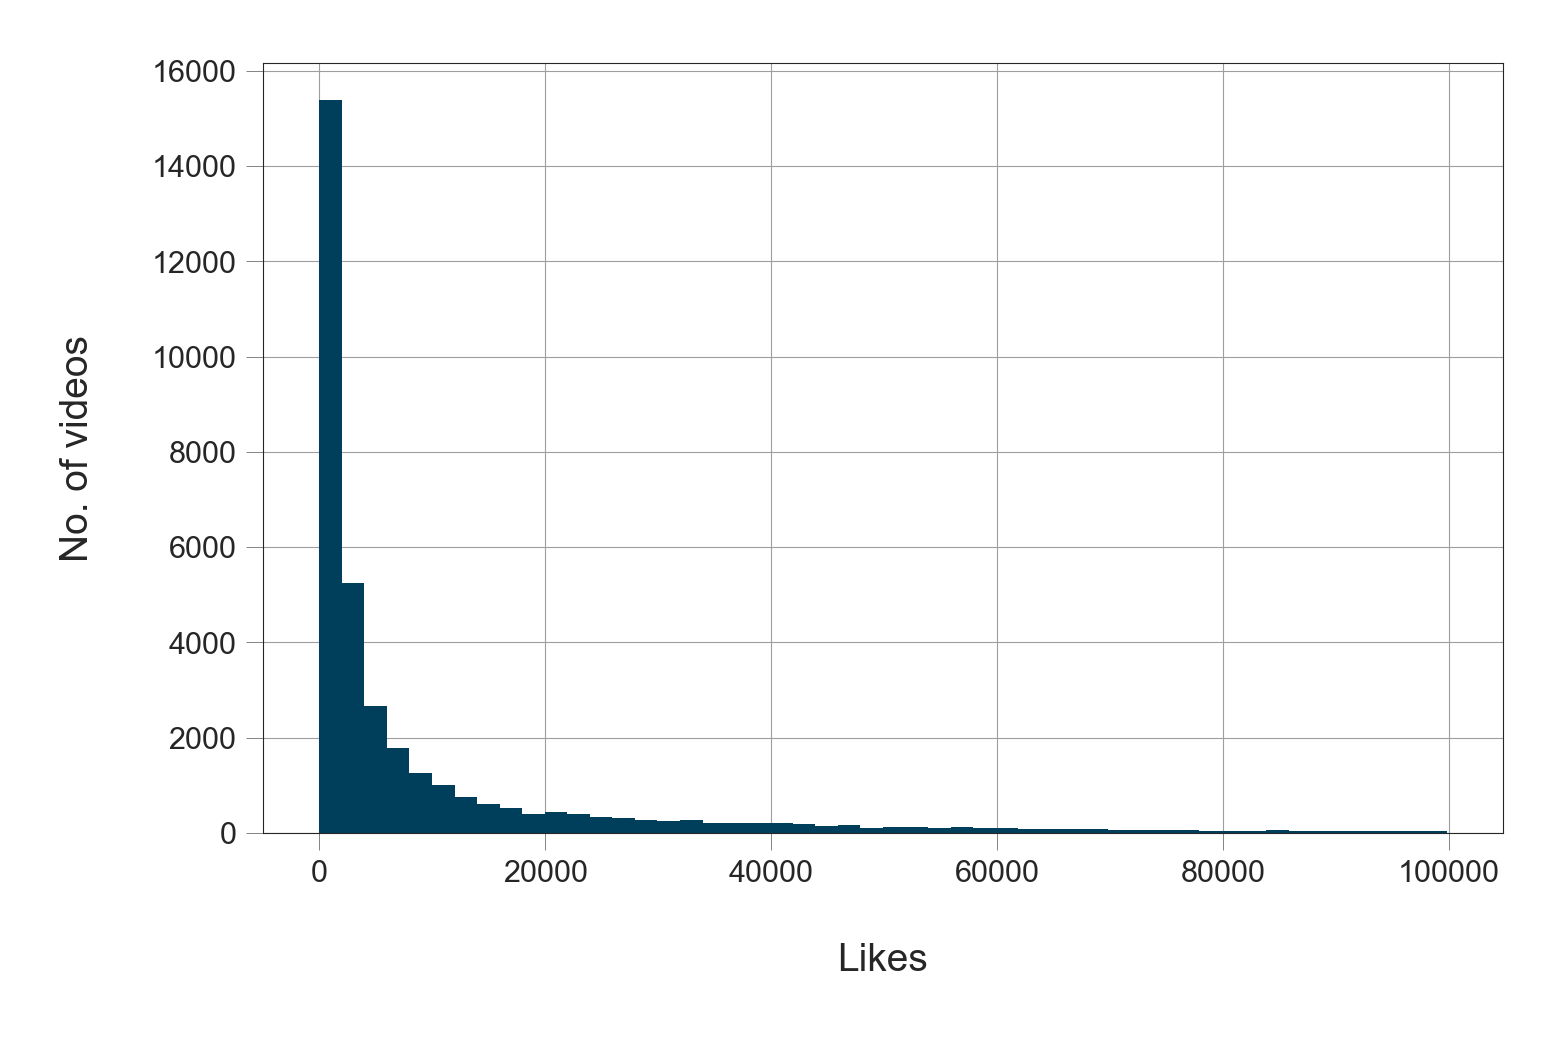

In [17]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [18]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

87.18676376097666

In [19]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

94.06725208824159

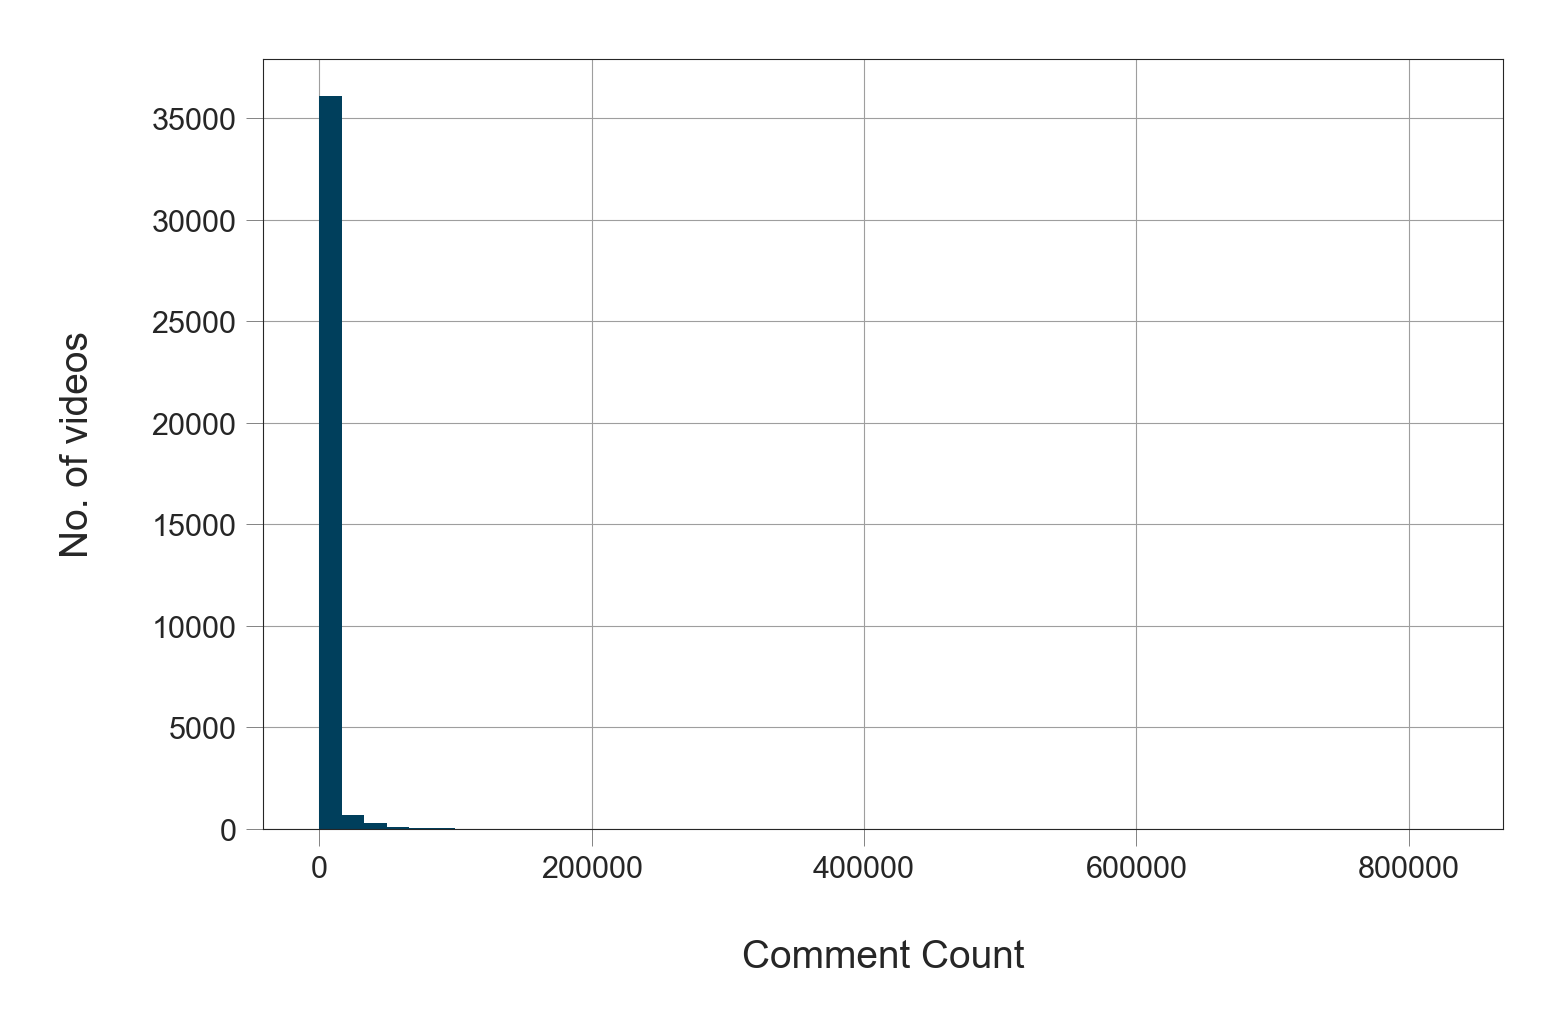

In [20]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

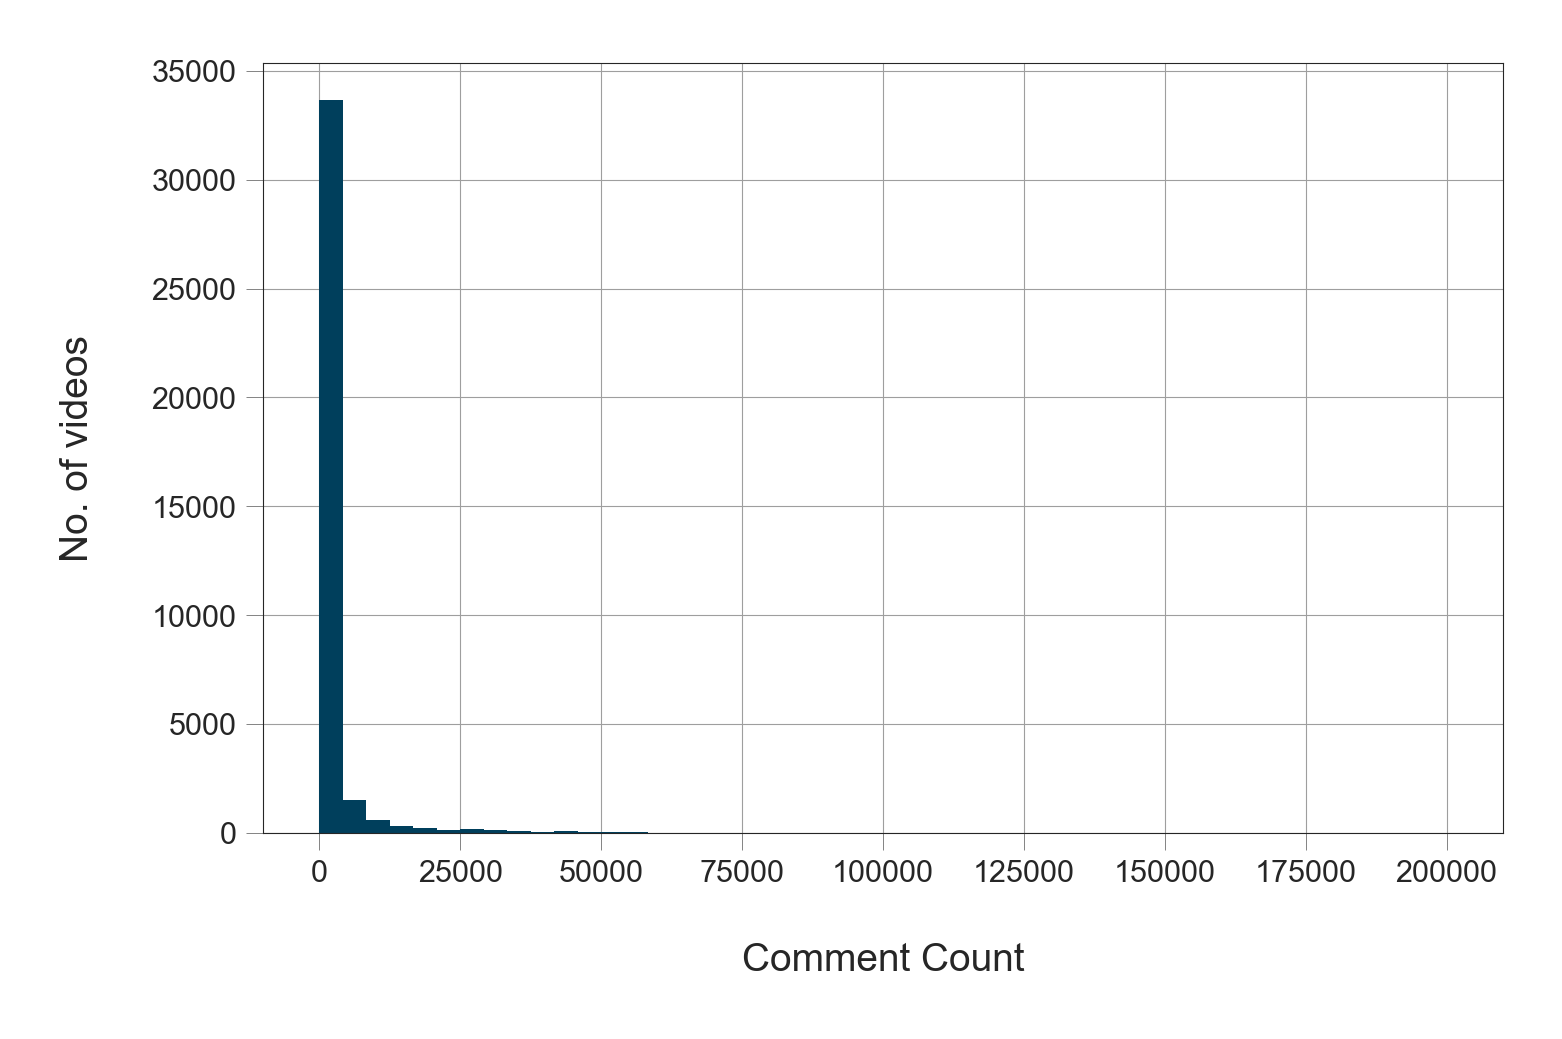

In [21]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [22]:
df[df['comment_count'] < 3500]['comment_count'].count() / df['comment_count'].count() * 100

88.41293638894838

In [23]:
df[df['comment_count'] < 25000]['comment_count'].count() / df['comment_count'].count() * 100

97.6895480831013

In [24]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


In [51]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name,publishing_day,publishing_hour
134,#NAME?,17.14.11,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",31052,36,11,2,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg,False,False,False,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,True,88,Entertainment,Mon,08
173,#NAME?,17.14.11,कुंभ राशि वालों के लिए 12 नवंबर - 18 नवंबर का ...,Jansatta,25,"कुंभ राशि|""Astro""|""rashi""|""कुंभ""|""jansatta""",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,,False,52,News & Politics,Sat,09
189,#NAME?,17.14.11,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",Health Tips for You,26,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",False,74,Howto & Style,Wed,12
298,#NAME?,17.15.11,18 नवम्बर 2017शनि अमावस्या को जरा से काले तिल ...,AstroMitram,22,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",28816,376,31,29,https://i.ytimg.com/vi/-X33hZ1oTXI/default.jpg,False,False,False,शनि अमावस्या 18 नवम्बर 2017 को जरा से काले तिल...,False,100,People & Blogs,Tue,05
360,#NAME?,17.15.11,BEST MOM EVER- Things you would love to hear f...,Old Delhi Films,24,"Mother|""mom""|""best mom""|""best dad ever""|""best ...",14529,1018,131,83,https://i.ytimg.com/vi/-x9Bp5lFyM0/default.jpg,False,False,False,"Things your MOTHER will never say, still you r...",True,66,Entertainment,Tue,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923,4642,908,920,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,True,96,Entertainment,Tue,05
37194,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,True,96,Entertainment,Tue,05
37202,#NAME?,18.14.06,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...,False,29,Film & Animation,Wed,07
37316,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,True,96,Entertainment,Tue,05


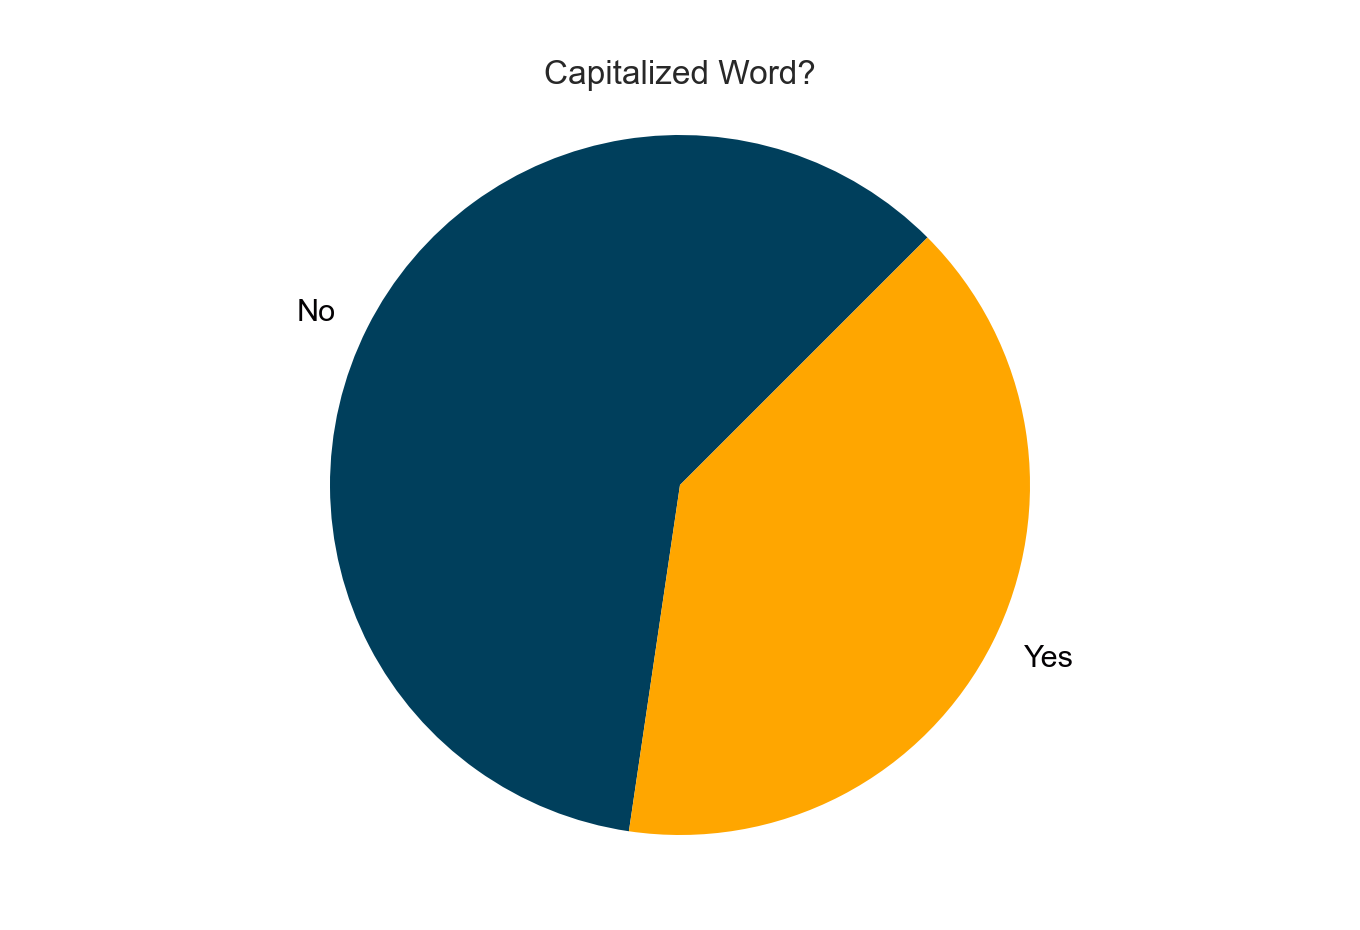

In [52]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=[PLOT_COLORS[4], '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Capitalized Word?')

In [53]:
df["contains_capitalized"].value_counts(normalize=True)

contains_capitalized
False   0.60
True    0.40
Name: proportion, dtype: float64

In [28]:
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88


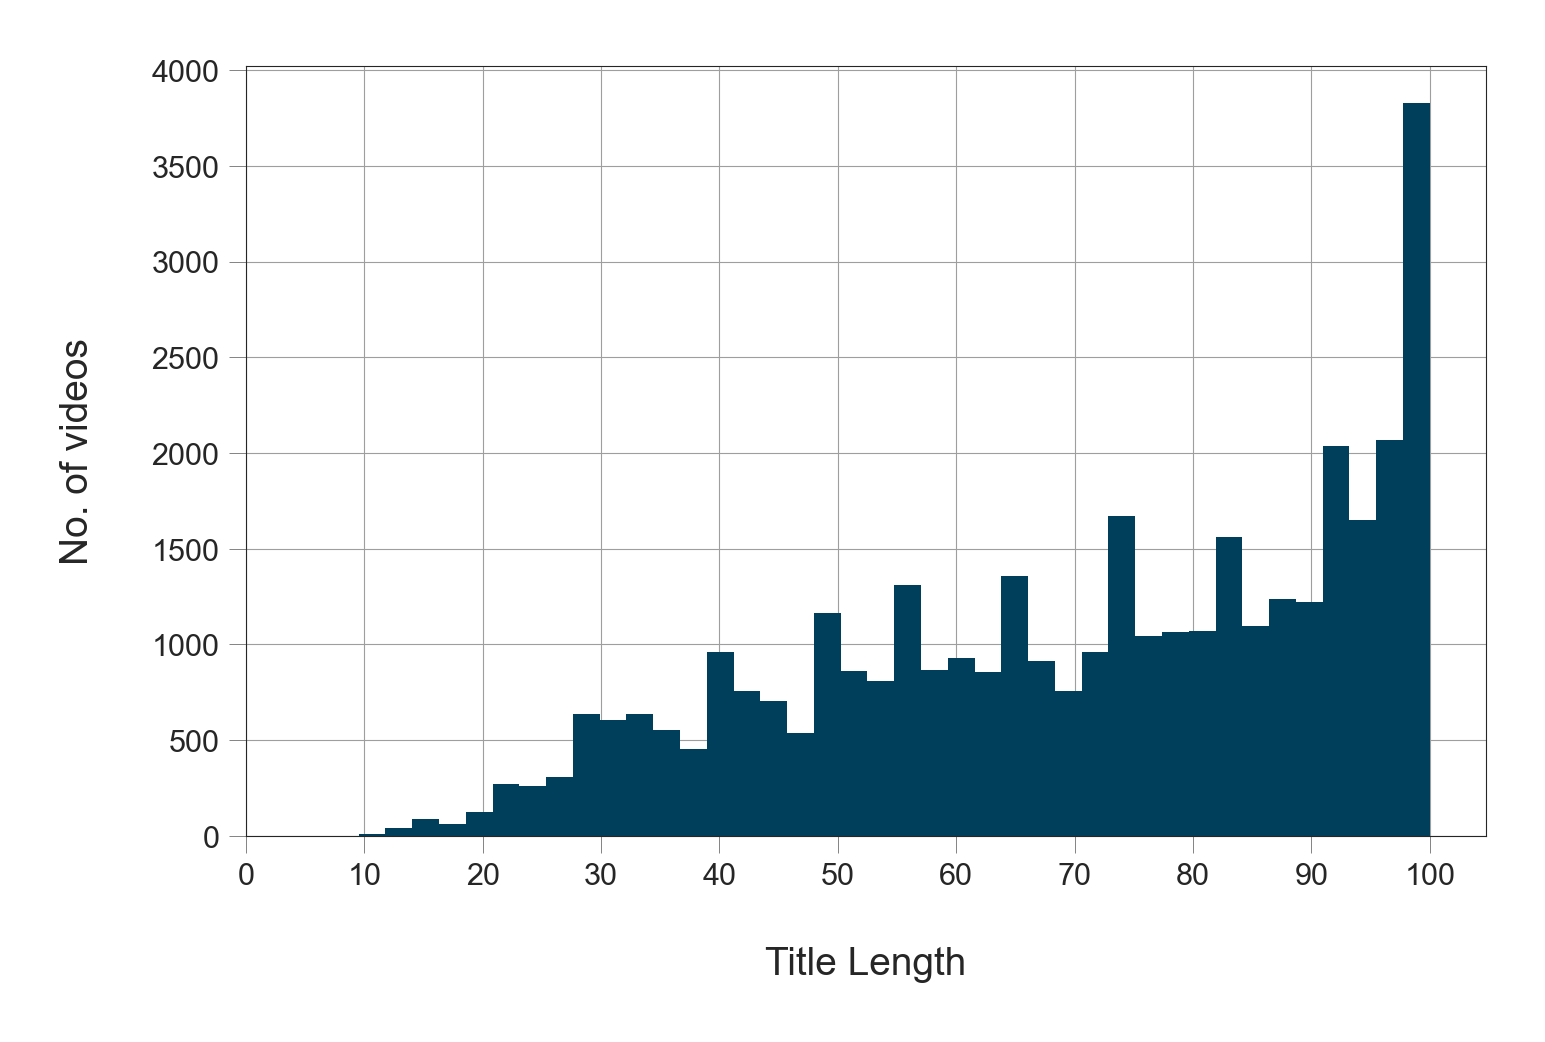

In [29]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

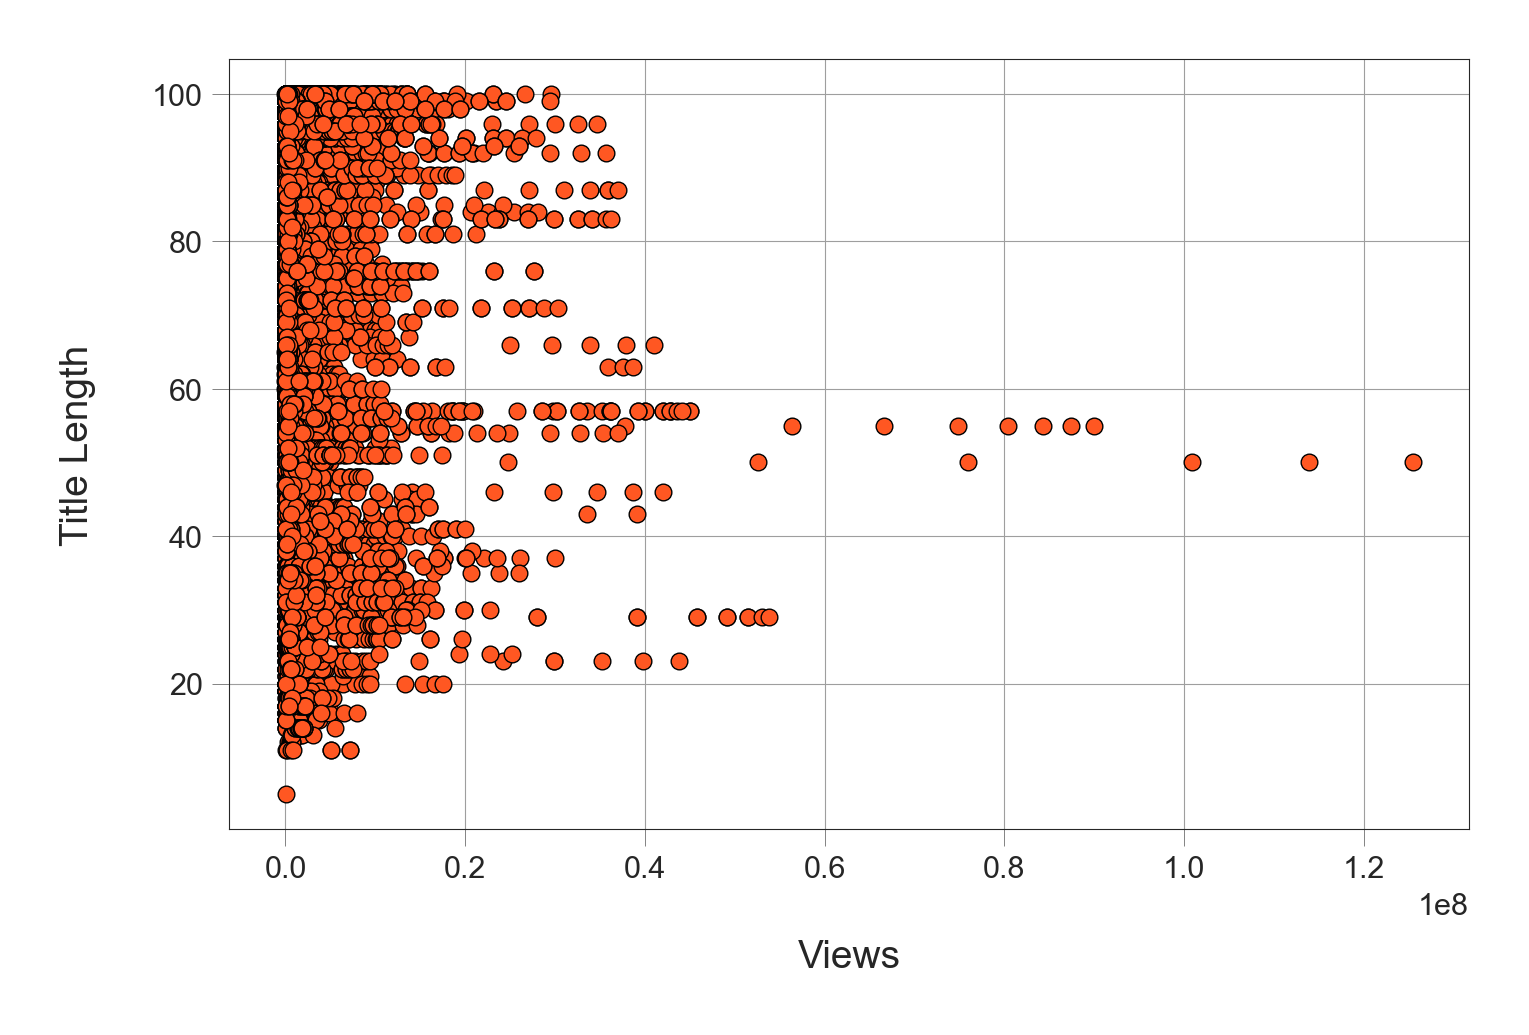

In [30]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

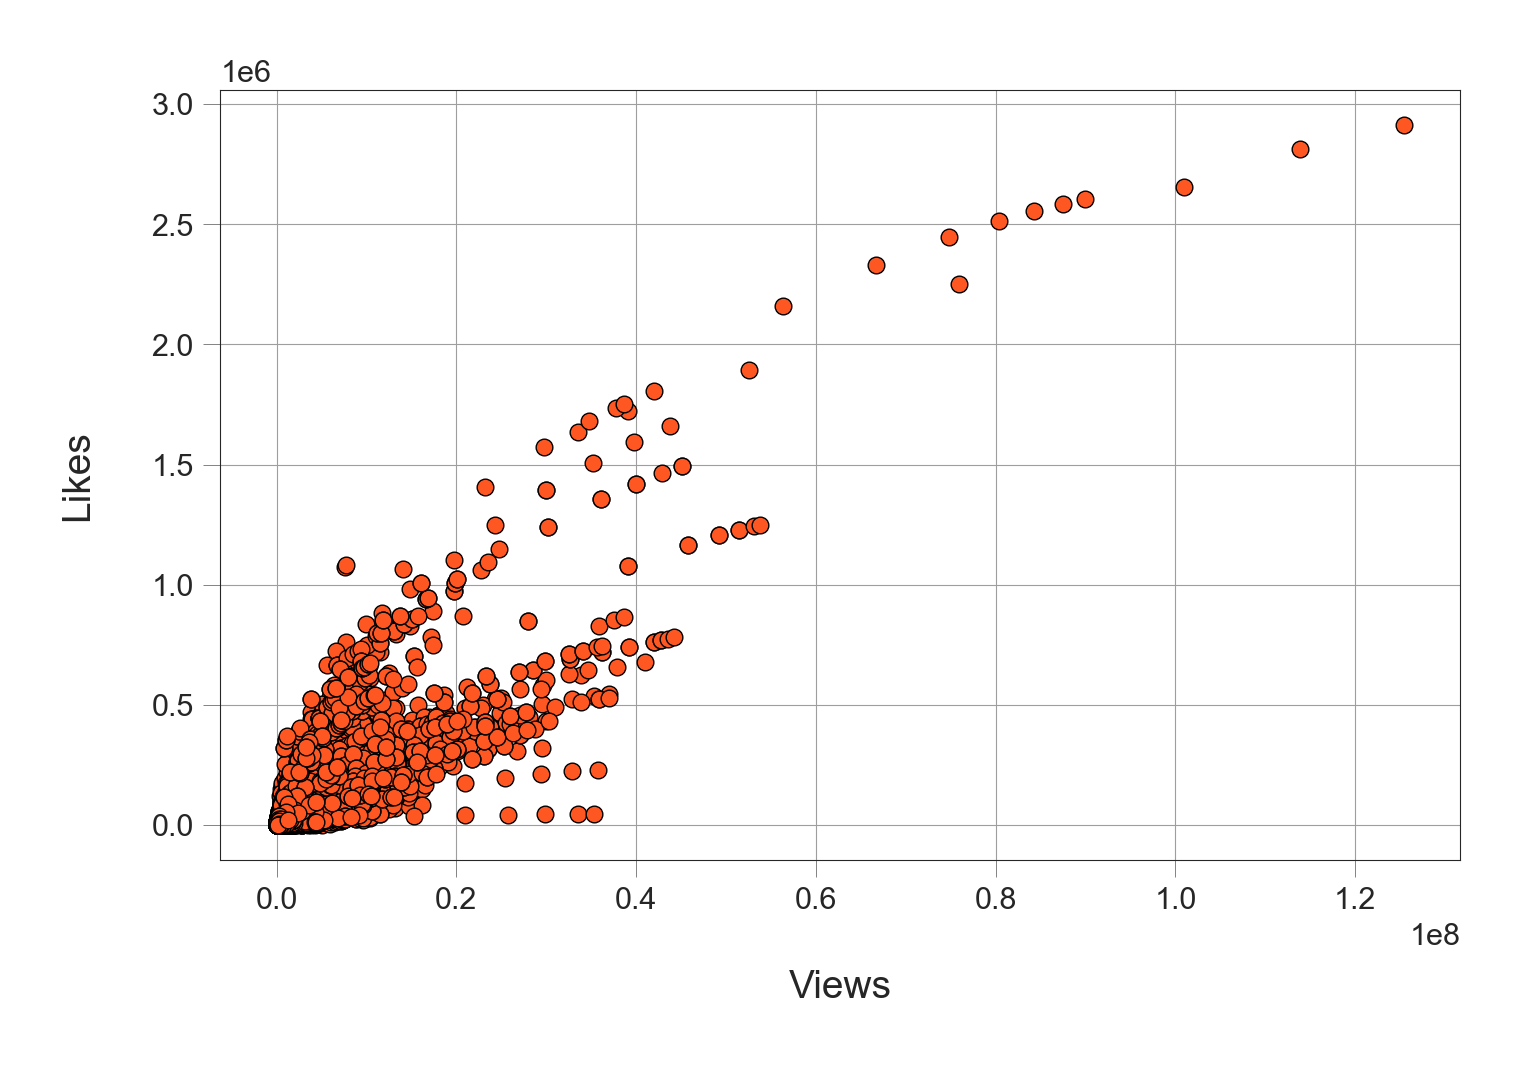

In [31]:

fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [32]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248),
 ('Songs', 1149),
 ('2', 1143),
 ('New', 1137),
 ('May', 1075),
 ('Punjabi', 1037)]

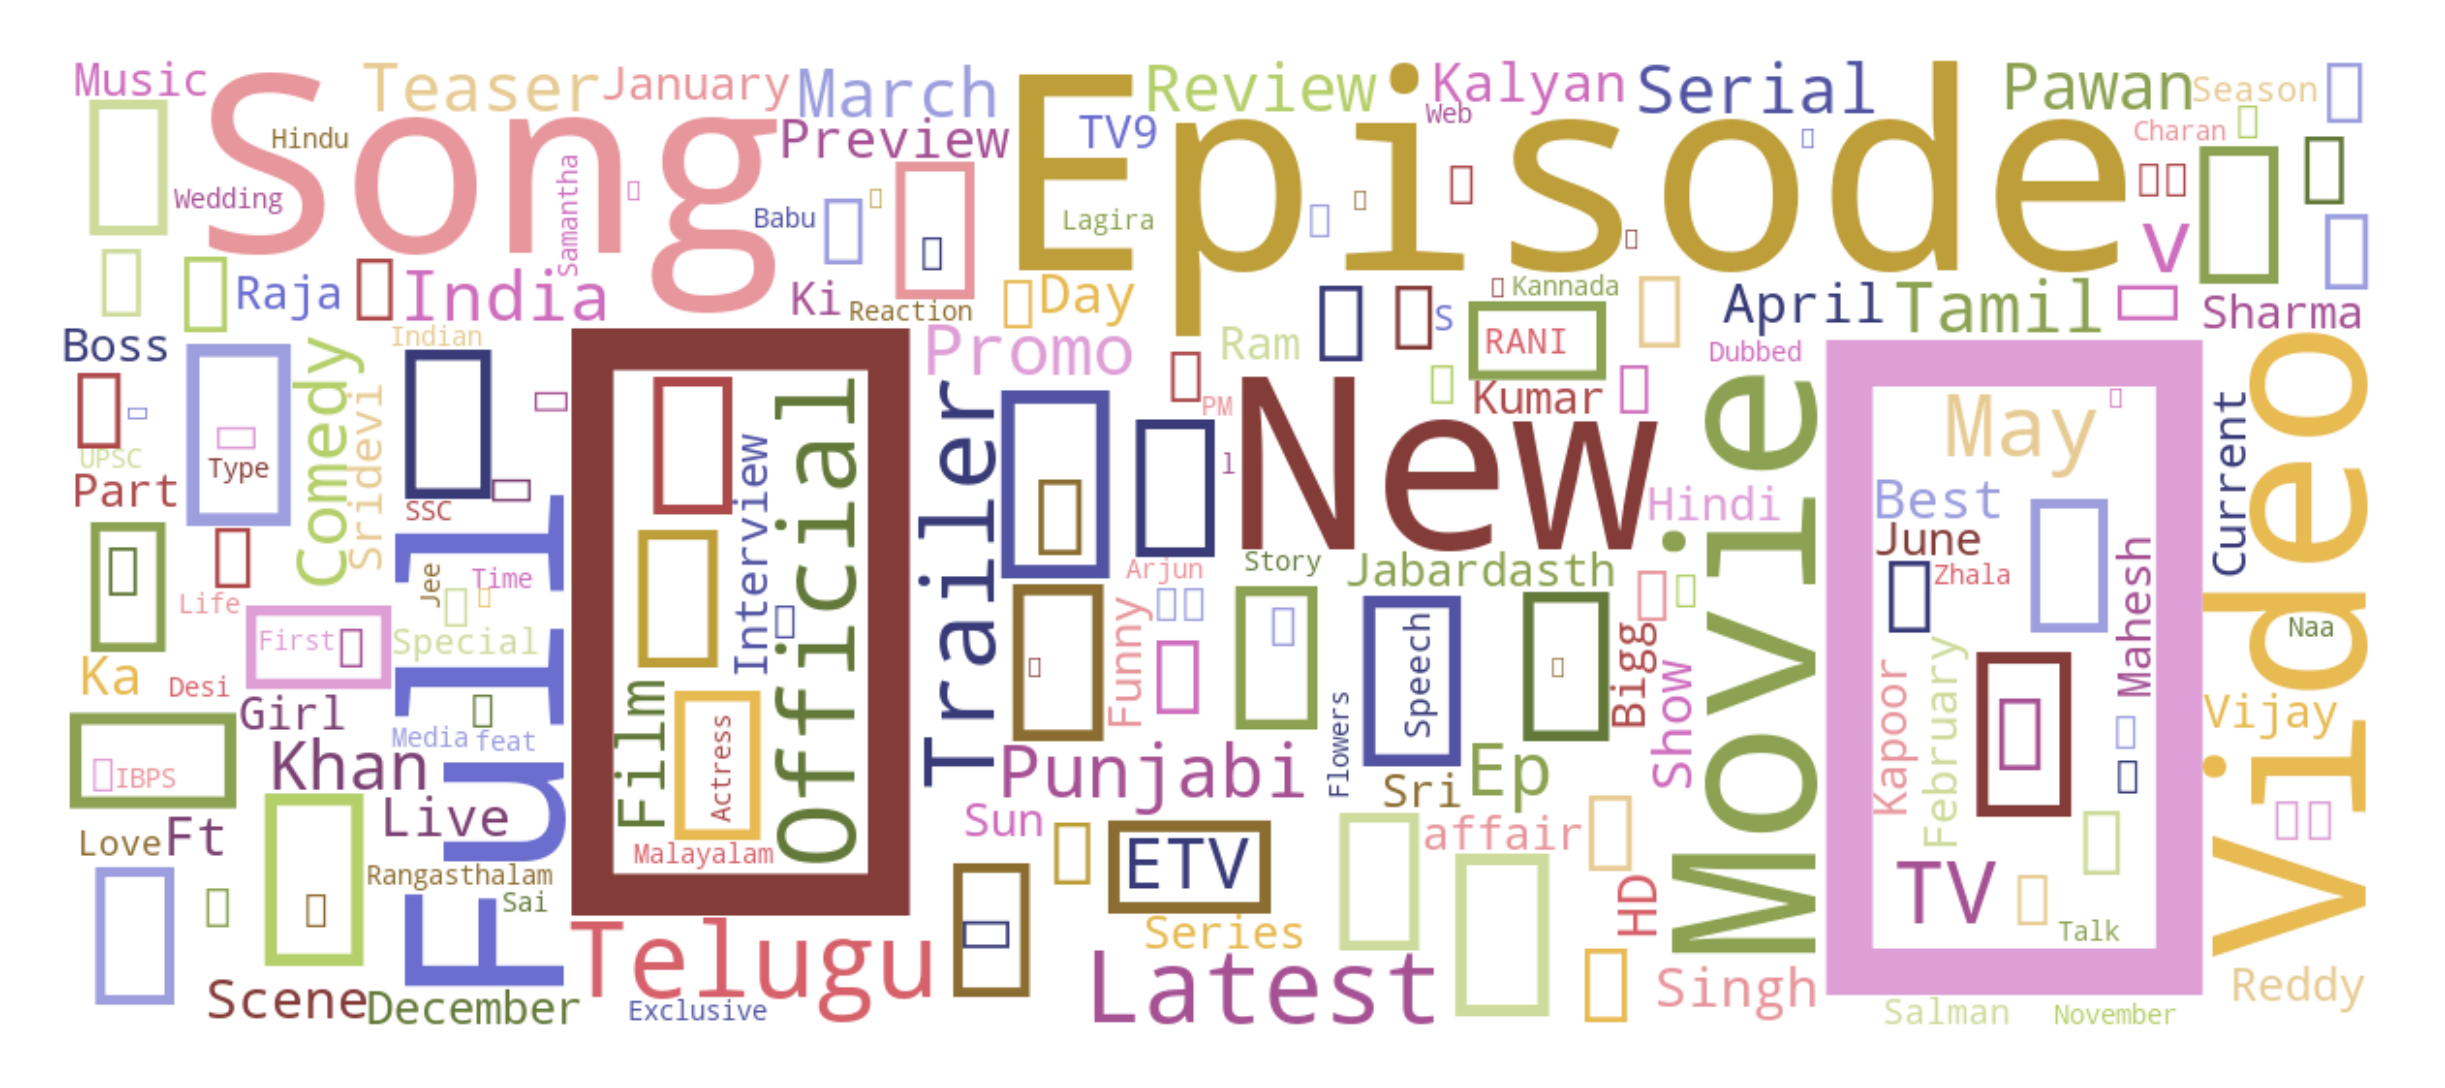

In [33]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

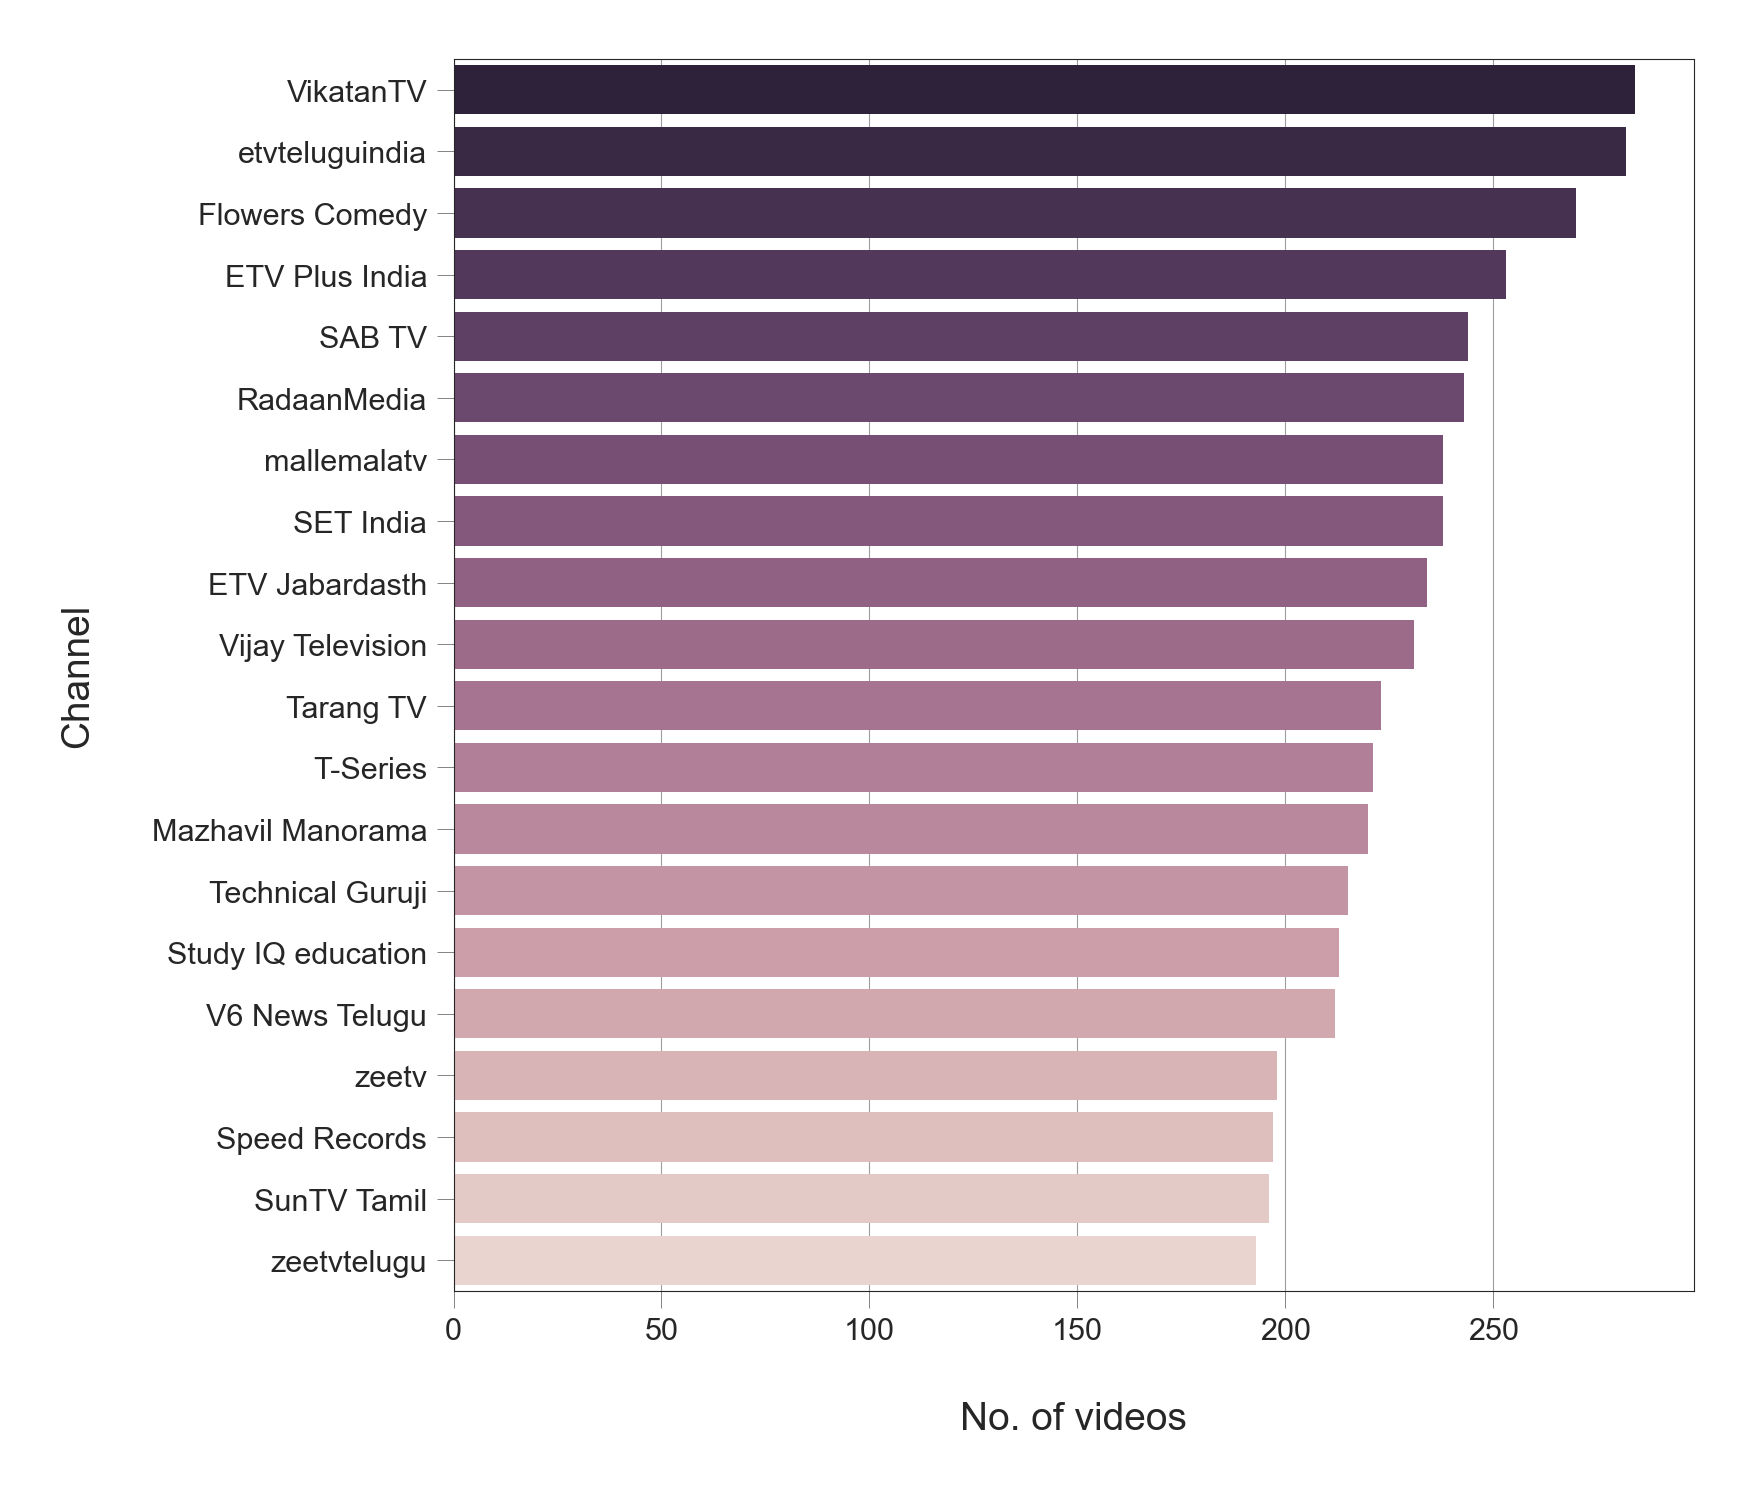

In [34]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [35]:
with open(r'C:\Users\vedas\Downloads\archive (3)\IN_category_id.json') as file:
    categories = json.load(file)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [36]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58,News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88,Entertainment


In [37]:
len(df[(df["category_name"] == 'Entertainment')].index)


16712

In [38]:
len(df[(df["category_name"] == 'News & Politics')].index)

5241

In [39]:
len(df[(df["category_name"] == 'Music')].index)

3858

In [40]:
len(df[(df["category_name"] == 'Movies')].index)

16

In [41]:
len(df[(df["category_name"] == 'Travel & Events')].index)

8

In [42]:

len(df[(df["category_name"] == 'Pets & Animals')].index)

3

In [43]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name,publishing_day,publishing_hour
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81,Film & Animation,Sun,12
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58,News & Politics,Mon,05
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58,Entertainment,Sun,15
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30,Comedy,Sun,07
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88,Entertainment,Mon,01


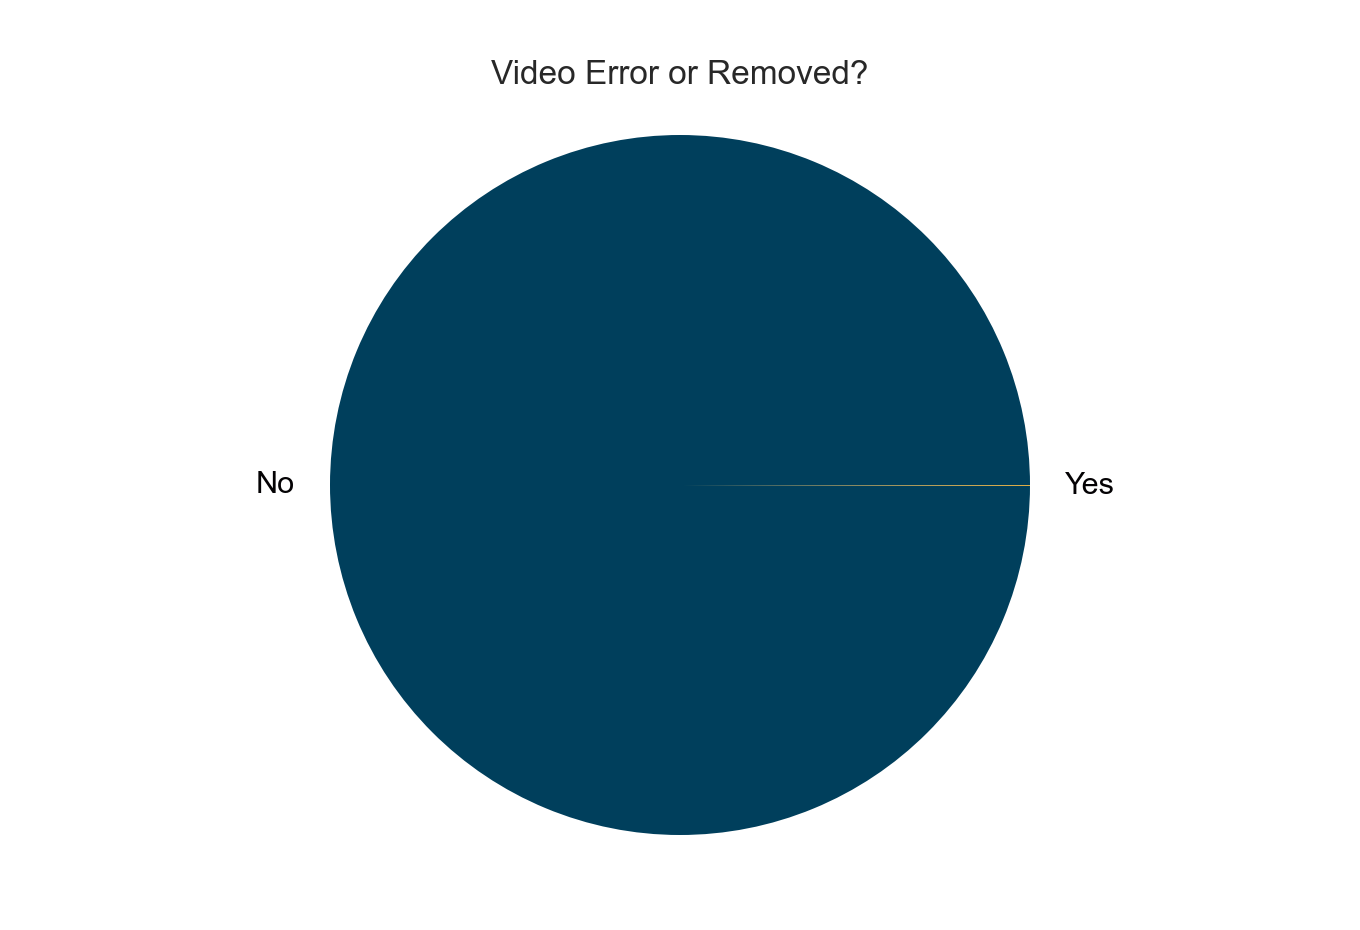

In [44]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')


In [45]:
df["video_error_or_removed"].value_counts()


video_error_or_removed
False    37341
True        11
Name: count, dtype: int64

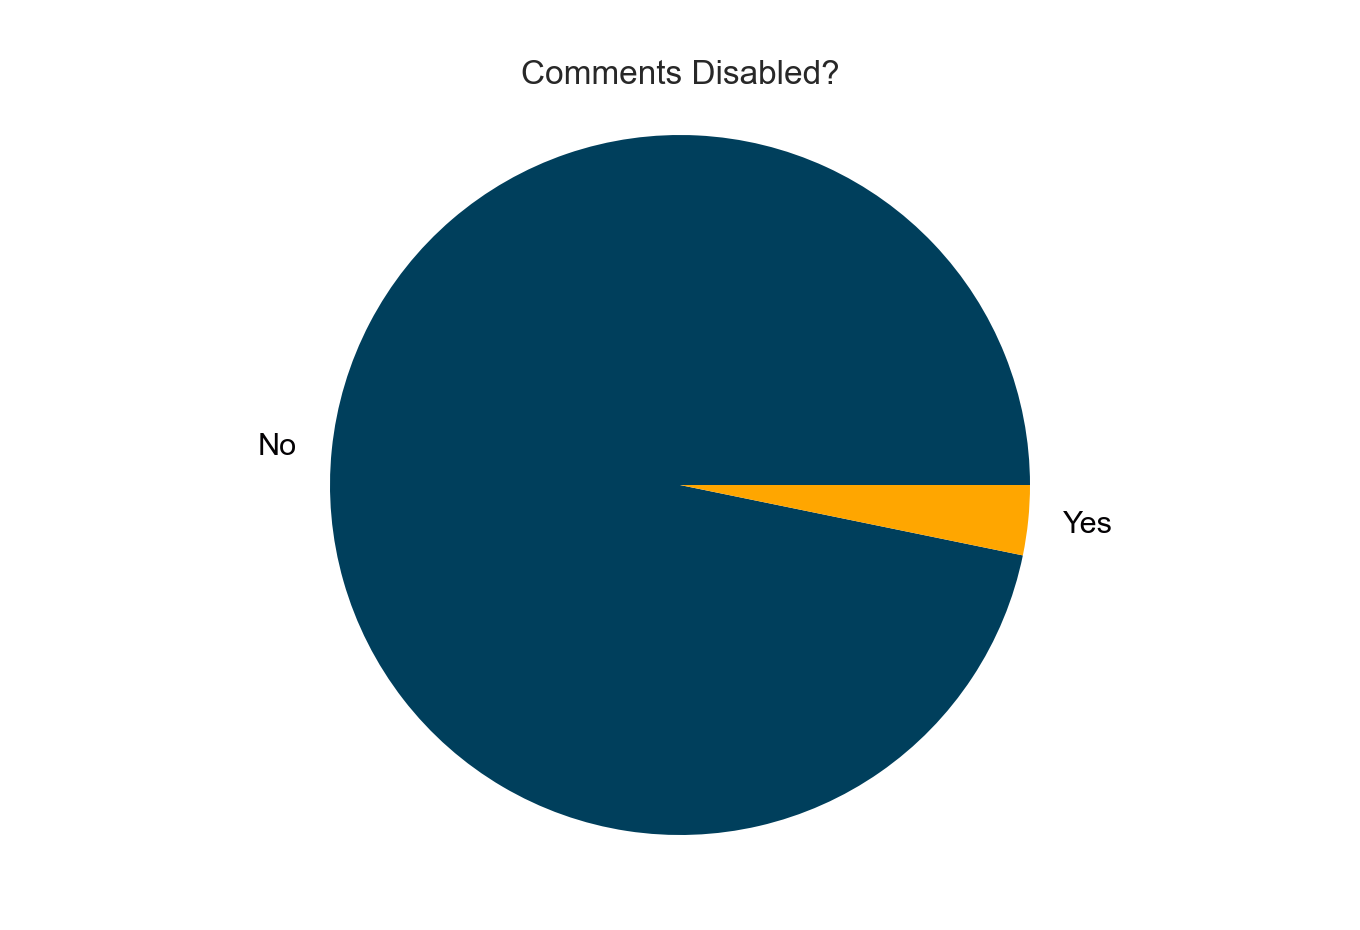

In [46]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [47]:
df["comments_disabled"].value_counts(normalize=True)

comments_disabled
False   0.97
True    0.03
Name: proportion, dtype: float64

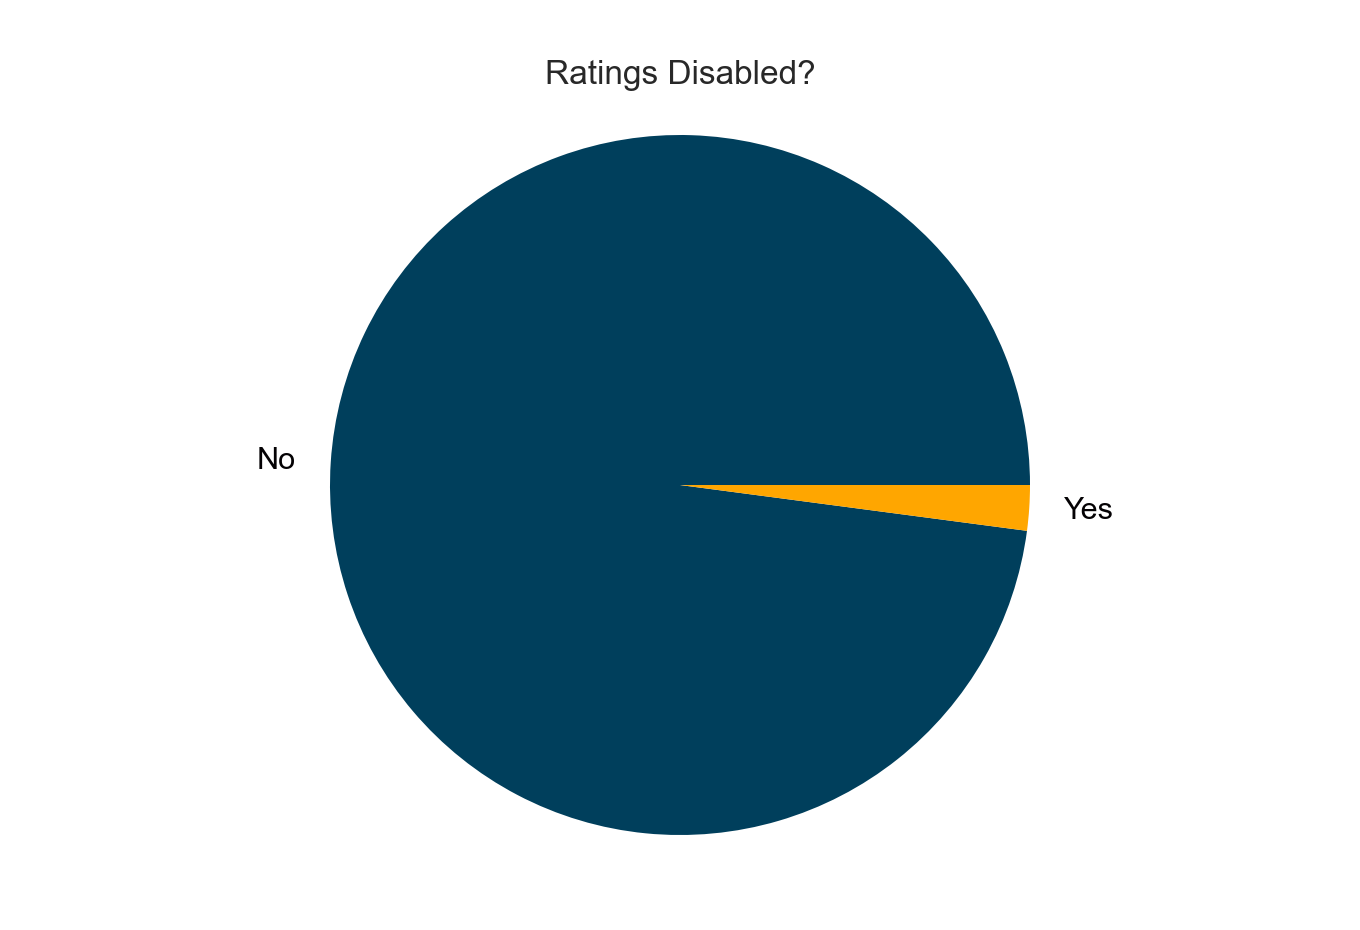

In [57]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [58]:
df["ratings_disabled"].value_counts()

ratings_disabled
False    36571
True       781
Name: count, dtype: int64

In [56]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

360